In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 1. Load dataset
df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. Convert the data given in the dataFrame into a NumPy array
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
# 3. Query the shape of the array
data_shape = data.shape
data_count = data_shape[0]
features = data_shape[1]

data_count, features

(42000, 785)

In [5]:
# 4. Shuffle the contents of the array 
np.random.shuffle(data)

In [6]:
# 5. Use first 1000 images of the dataset as the test set and remaining as the train set
test = data[:1000]
train = data[1000:]

In [7]:
# For test set -- Transpose the data (Take rows as the labels of the test set and rows as the features)
test = test.T
X_test = test[1:, :]
y_test = test[0,:]
X_test = X_test / 255 # Color normalization


test.shape, X_test.shape, y_test.shape 

((785, 1000), (784, 1000), (1000,))

In [8]:
# For train set -- Transpose the data (Take rows as the labels and rows as the features)
train = train.T
X_train = train[1:, :]
y_train = train[0]

X_train = X_train / 255

train.shape, X_train.shape, y_train.shape 

((785, 41000), (784, 41000), (41000,))

In [9]:
# Generate a random index in the range dedicated for training images
index = np.random.randint(0, len(train),1)
index

array([245])

In [10]:
train.shape

(785, 41000)

In [11]:
train[index].shape

(1, 41000)

In [12]:
train_ = train.T
new_img = train_[index, :-1]
new_img.shape

new_image = new_img.reshape(28,-1)
new_image.shape

(28, 28)

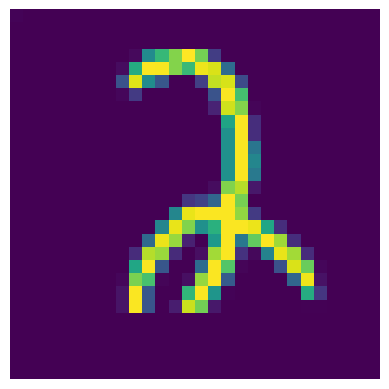

In [13]:
# X_test_2d = new_img.reshape(28,-1)
# X_test_2d.shape
plt.imshow(new_image) 
plt.axis('off')
plt.show()

In [14]:
def kaiming_normal(w_shape):
    n_input = w_shape[1]
    var = 2.0 / n_input
    sd = np.sqrt(var)
    return np.random.normal(0, sd, size = w_shape)

In [15]:
# Kaiming

def initial_params():    
    W1 = kaiming_normal((10,784))
    W2 = kaiming_normal((10,10))
    b1 = np.random.normal(0, 1, size=(10,1))
    b2 = np.random.normal(0, 1, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2

_, _, W2, _ = initial_params()
W2[:100]

array([[ 0.06358898, -0.0877864 ,  0.22004528,  0.58800698,  0.43384276,
         0.32806278,  0.40632513,  0.43687746,  0.06738837, -0.15414582],
       [ 0.66496113, -0.55662542, -0.70106107, -0.01164624,  0.68126611,
        -0.40686528, -0.37656054, -0.25225888,  0.46470585,  0.2826973 ],
       [ 1.60088014,  0.68634986,  0.1796249 , -0.15086612,  0.1077582 ,
         0.14001776, -0.4383995 ,  0.50367788, -0.24363866, -0.89260631],
       [-0.23113444, -0.0876418 , -1.05959559, -0.08371336,  0.12926065,
        -0.08378756,  0.44900258, -0.52849837, -0.14804141,  0.09923857],
       [-0.91225448, -0.55205948,  0.42908103, -0.25728462, -0.07691364,
        -0.09211079,  0.14588753,  0.28138981,  0.06761662, -0.22555003],
       [-0.78399434,  0.02147527,  0.05467587, -0.22225695, -0.12587557,
        -0.29819406, -0.00321233,  0.46345018, -0.31101149,  0.38655861],
       [-0.85153723, -0.35799047,  0.01942189, -0.49981128, -0.71655638,
        -0.04608068, -0.02028112, -0.33346226

In [16]:
def ReLU_fn(vector):
    return np.maximum(0, vector)

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = ReLU_fn(vector)
vector, relu

(array([[-0.48959455],
        [ 0.05907504],
        [ 0.10954416],
        [ 0.48955699],
        [ 0.0676266 ],
        [-0.11390058],
        [-0.42091388],
        [ 0.27490428],
        [-0.48036019],
        [-0.00411735]]),
 array([[0.        ],
        [0.05907504],
        [0.10954416],
        [0.48955699],
        [0.0676266 ],
        [0.        ],
        [0.        ],
        [0.27490428],
        [0.        ],
        [0.        ]]))

In [17]:
def d_ReLU(vector):
    return np.where(vector > 0, 1.0, 0.0)


vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = d_ReLU(vector)
relu

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [18]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

array([-0.19201715, -0.32836129,  0.0550227 , -0.10767674,  0.28063968,
        0.27998038,  0.01570492, -0.4403324 , -0.06669654,  0.40890852,
        0.        ])

(-0.5, 0.5)

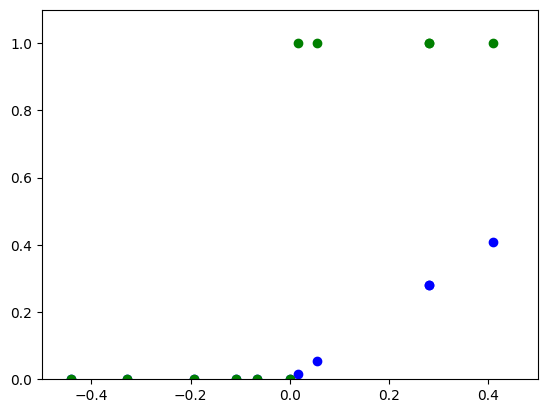

In [19]:
relu = ReLU_fn(vector)
d_relu = d_ReLU(vector)

plt.scatter(vector, relu, c='blue')
plt.scatter(vector, d_relu, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)

In [20]:
def softmax_fn(vector):
    exp_vector = np.exp(vector - np.max(vector))
    return exp_vector / exp_vector.sum()

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
softmax = softmax_fn(vector)
vector, softmax

(array([[-0.30393461],
        [-0.24351873],
        [-0.22372599],
        [ 0.41471819],
        [-0.40632148],
        [-0.36797253],
        [ 0.24559992],
        [-0.10027225],
        [-0.01095354],
        [ 0.28598809]]),
 array([[0.07609942],
        [0.08083875],
        [0.08245471],
        [0.15613069],
        [0.06869344],
        [0.07137893],
        [0.13183816],
        [0.09328907],
        [0.10200498],
        [0.13727185]]))

In [21]:
# def df_softmax(vector):
#     d_softmax = softmax_fn(vector) * (1 - softmax_fn(vector))

#     return d_softmax

# vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
# d_softmax = softmax_fn(vector)
# vector, d_softmax

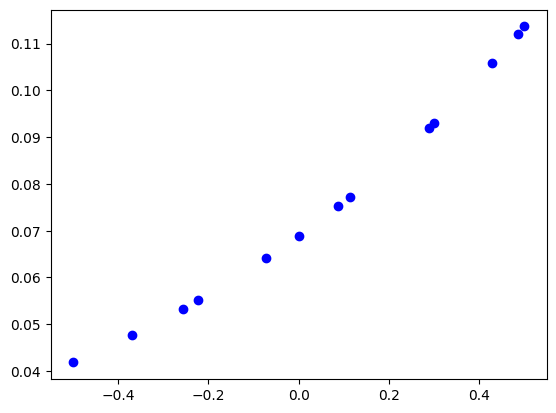

In [22]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000, -0.5, 0.5])
vector

softmax = softmax_fn(vector)
# d_softmax = df_softmax(vector)

plt.scatter(vector, softmax, c='blue')
# plt.scatter(vector, d_softmax, c='green')


In [23]:
def forward_prop(W1, b1, W2, b2, A0):
    Z1 = np.dot(W1, A0) + b1
    A1 = ReLU_fn(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax_fn(Z2)

    return Z1, A1, Z2, A2

In [24]:
# One hot encoding
def one_hot_encoding(Y, num_classes):
    num_classes = int(num_classes)  # Ensure num_classes is an integer
    encoded_mat = np.zeros((num_classes, len(Y)))
    for i in range(len(Y)):
        class_index = int(Y[i])
        encoded_mat[class_index, i] = 1
    return encoded_mat

y_train = one_hot_encoding(y_train, num_classes=10)
y_train.shape
y_test = one_hot_encoding(y_test, num_classes=10)
y_test.shape


(10, 1000)

In [25]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, y, A0, y_train):
    m = A0.shape[1]
    dZ2 = A2 - y_train
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)

    dW1 = (1 / m) * np.dot(dZ1, A0.T)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

In [26]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate= 0.01):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

In [27]:
def obtain_predictions(vector):  # Corrected parameter name
    return np.argmax(vector, axis=0)


In [28]:
%pip install scikit-learn
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [29]:
def accuracy_sc(y_pred, y_actual): # Vectors  
    num_samples = y_actual.shape[1]

    if y_pred.ndim ==2:
        pred_label = obtain_predictions(y_pred)
    else:
        pred_label = y_pred
        
    if y_actual.ndim == 2:
        actual_label = obtain_predictions(y_actual)
    else:
        actual_label = y_actual
    
    num_correct = np.sum(pred_label == actual_label)
    # print(num_correct)
    return num_correct / num_samples

In [30]:
y_train.shape

(10, 41000)

In [31]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations):
    W1, b1, W2, b2 = initial_params()

    accuracy_list = []

    for i in range(num_iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, y_train, X_train, y_train)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i%5==0:
            accuracy = accuracy_sc(A2,y_train)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return W1, b1, W2, b2, accuracy_list

In [32]:
def make_prediction(X_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test) 
    pred = obtain_predictions(A2)
    return pred    

In [33]:
def plot_image(image):
    X_test_2d = image.reshape(28,-1)
    print(X_test_2d.shape)
    plt.imshow(X_test_2d) 
    plt.axis('off')
    plt.show()

In [34]:
W1, b1, W2, b2, accuracy_list = gradient_descent(X_train, y_train, learning_rate=0.0001, num_iterations=1000)

Iteration: 0 	 Accuracy: 0.04317
Iteration: 5 	 Accuracy: 0.04327
Iteration: 10 	 Accuracy: 0.04334
Iteration: 15 	 Accuracy: 0.04349
Iteration: 20 	 Accuracy: 0.04341
Iteration: 25 	 Accuracy: 0.04351
Iteration: 30 	 Accuracy: 0.04351
Iteration: 35 	 Accuracy: 0.04356
Iteration: 40 	 Accuracy: 0.04368
Iteration: 45 	 Accuracy: 0.04383
Iteration: 50 	 Accuracy: 0.04398
Iteration: 55 	 Accuracy: 0.04402
Iteration: 60 	 Accuracy: 0.04417
Iteration: 65 	 Accuracy: 0.04432
Iteration: 70 	 Accuracy: 0.04439
Iteration: 75 	 Accuracy: 0.04449
Iteration: 80 	 Accuracy: 0.04456
Iteration: 85 	 Accuracy: 0.04468
Iteration: 90 	 Accuracy: 0.04471
Iteration: 95 	 Accuracy: 0.04476
Iteration: 100 	 Accuracy: 0.04498
Iteration: 105 	 Accuracy: 0.04495
Iteration: 110 	 Accuracy: 0.04500
Iteration: 115 	 Accuracy: 0.04522
Iteration: 120 	 Accuracy: 0.04524
Iteration: 125 	 Accuracy: 0.04541
Iteration: 130 	 Accuracy: 0.04551
Iteration: 135 	 Accuracy: 0.04568
Iteration: 140 	 Accuracy: 0.04583
Iterati

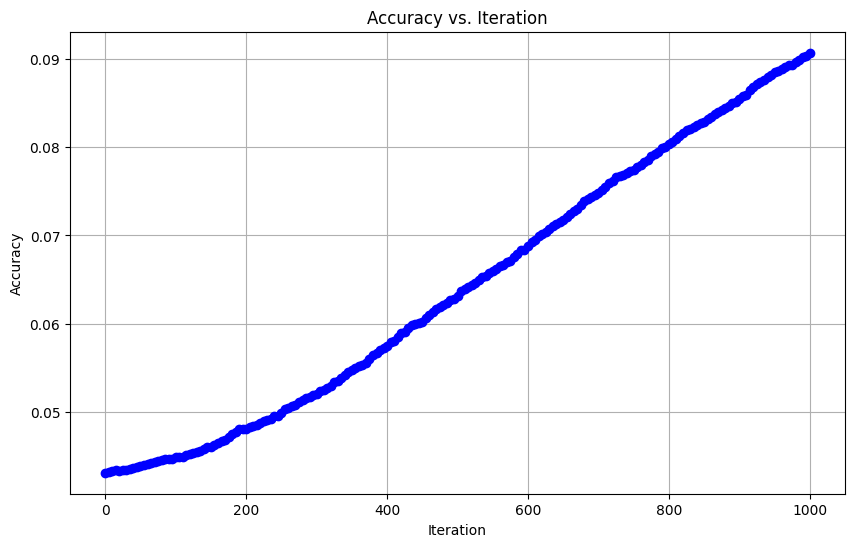

In [35]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [36]:
def test_predictions(W1, b1, W2, b2, X_test, y_test):
    test = make_prediction(X_test, W1, b1, W2, b2)
    image = X_test.T
    print(test.shape)
    accuracy = accuracy_sc(test, y_test)
    print(f"Accuracy:{accuracy}")
    y_test_label = obtain_predictions(y_test)
    for i in range(10):
        print(test[i], y_test_label[i])
        print(image[i].shape)
        plot_image(image[i])

(1000,)
Accuracy:0.102
7 4
(784,)
(28, 28)


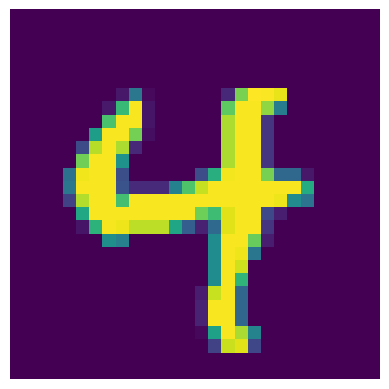

7 2
(784,)
(28, 28)


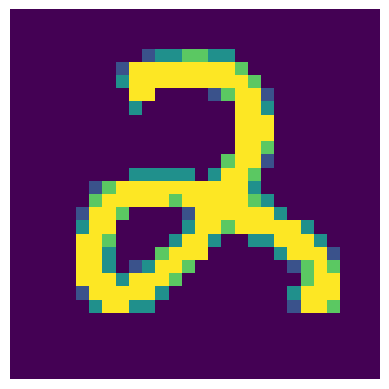

7 8
(784,)
(28, 28)


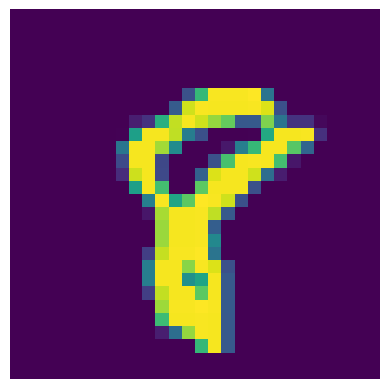

7 5
(784,)
(28, 28)


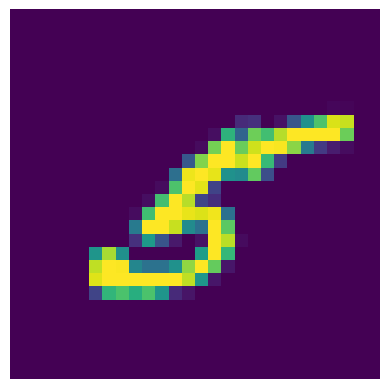

7 5
(784,)
(28, 28)


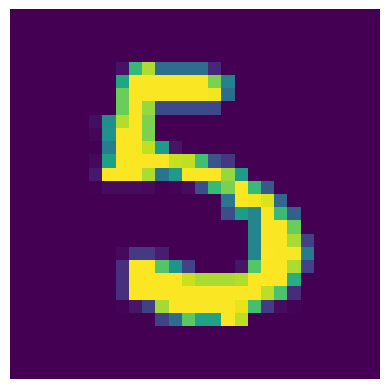

7 3
(784,)
(28, 28)


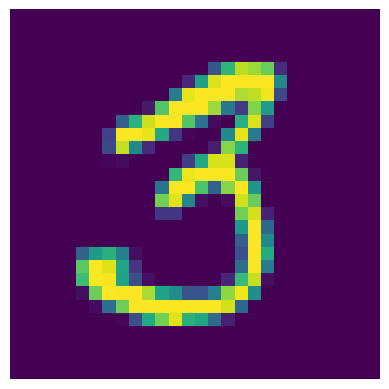

2 6
(784,)
(28, 28)


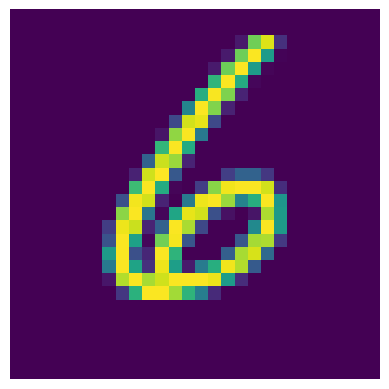

7 4
(784,)
(28, 28)


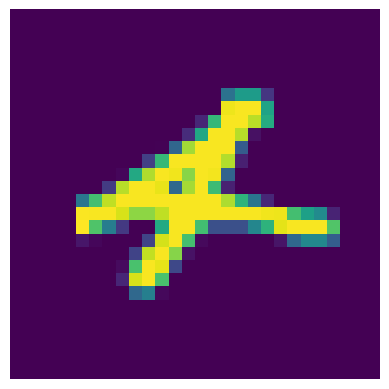

7 1
(784,)
(28, 28)


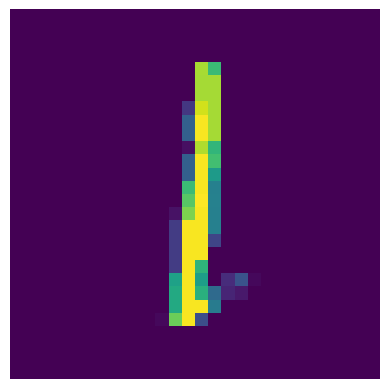

7 0
(784,)
(28, 28)


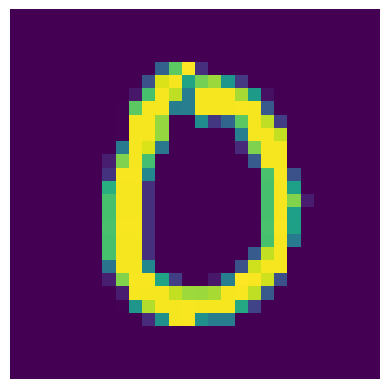

In [38]:
test_predictions(W1, b1, W2, b2, X_test, y_test)